In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os 

In [4]:
data=np.load('data-memory-save.npy')
target=np.load('target-memory-save.npy')

print(data.shape)
print(target.shape)

(24946, 50, 50, 1)
(24946, 2)


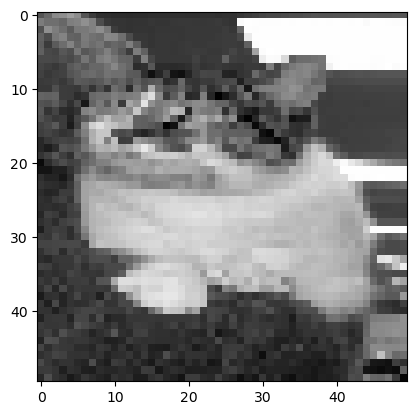

In [3]:
plt.imshow(data[2000],cmap='gray')

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(50,50,1),kernel_initializer = 'orthogonal'))
#model.add(Conv2D(256,(3,3),input_shape=data.shape[1:],padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 16)      

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [7]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),steps_per_epoch=len(train_data)//bs,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//bs,epochs=10)

Epoch 1/10
701/701 [==============================] - 29s 40ms/step - loss: 0.6869 - accuracy: 0.5424 - val_loss: 0.6764 - val_accuracy: 0.5735
Epoch 2/10
701/701 [==============================] - 26s 37ms/step - loss: 0.6802 - accuracy: 0.5668
Epoch 3/10
701/701 [==============================] - 27s 39ms/step - loss: 0.6764 - accuracy: 0.5713
Epoch 4/10
701/701 [==============================] - 29s 41ms/step - loss: 0.6677 - accuracy: 0.5907
Epoch 5/10
701/701 [==============================] - 28s 39ms/step - loss: 0.6511 - accuracy: 0.6269
Epoch 6/10
701/701 [==============================] - 27s 39ms/step - loss: 0.6406 - accuracy: 0.6337
Epoch 7/10
701/701 [==============================] - 26s 37ms/step - loss: 0.6328 - accuracy: 0.6432
Epoch 8/10
701/701 [==============================] - 26s 38ms/step - loss: 0.6194 - accuracy: 0.6613
Epoch 9/10
701/701 [==============================] - 26s 37ms/step - loss: 0.6125 - accuracy: 0.6660
Epoch 10/10
701/701 [===================

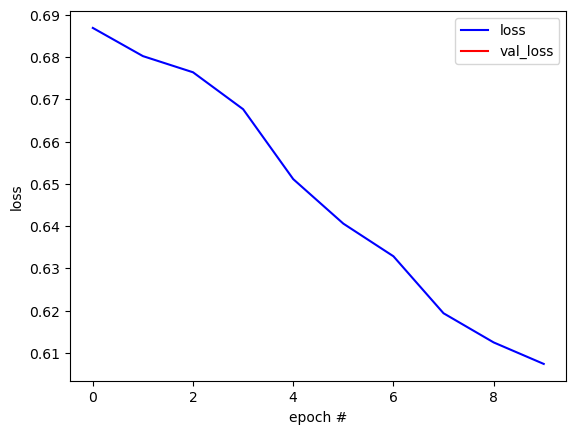

In [8]:
plt.plot(model.history.history['loss'],'b',label='loss')
plt.plot(model.history.history['val_loss'],'r',label='val_loss')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

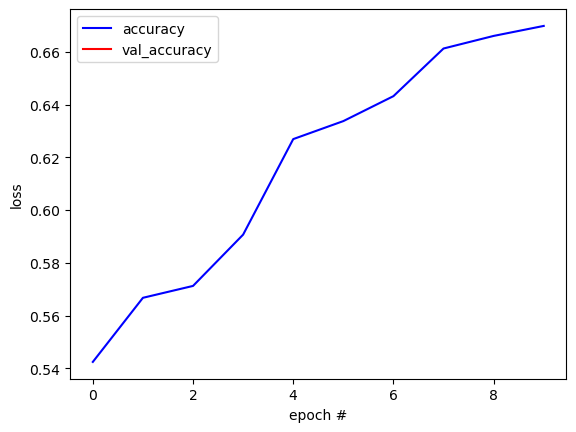

In [9]:
plt.plot(model.history.history['accuracy'],'b',label='accuracy')
plt.plot(model.history.history['val_accuracy'],'r',label='val_accuracy')

plt.legend()

plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()

In [10]:
predicted_target=model.predict(test_data)

test_labels=np.argmax(test_target,axis=1)

validation_labels=np.argmax(predicted_target,axis=1)

78/78 [==============================] - 1s 10ms/step


In [11]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(test_labels, validation_labels)))
print()
print("Classification Report:")
print(classification_report(test_labels, validation_labels,target_names=['Cat', 'Dog']))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(test_labels, validation_labels)))

The accuracy score of Random Forest Classifier is 0.6969939879759519

Classification Report:
              precision    recall  f1-score   support

         Cat       0.82      0.52      0.64      1276
         Dog       0.64      0.88      0.74      1219

    accuracy                           0.70      2495
   macro avg       0.73      0.70      0.69      2495
weighted avg       0.73      0.70      0.69      2495


The AUC-ROC score is 0.7011232805552627


In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(test_labels,validation_labels)
print(matrix)

[[ 664  612]
 [ 144 1075]]


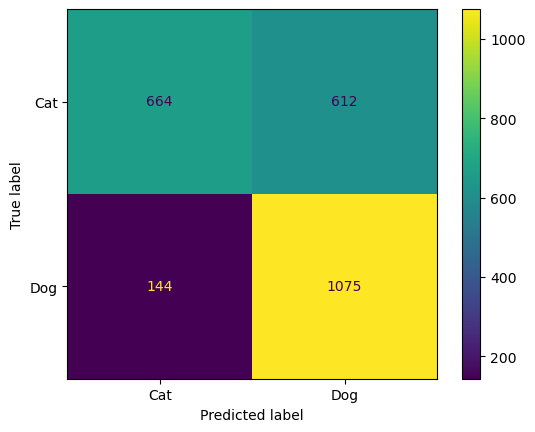

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Cat', 'Dog'])
disp.plot()